In [ ]:
import rp
import source.peekaboo as peekaboo
from source.peekaboo import run_peekaboo
from source.clip import get_clip_logits

In [ ]:
#Mario vs Luigi Part 1
results_collection=[]

In [66]:
def get_clip_logits_per_image(prompt, images):
    return [get_clip_logits(image, [prompt])[0] for image in images]

def random_colors(length=100):
    return [rp.random_rgb_float_color() for _ in range(length)]

def get_score(foreground, alpha, prompt:str, colors:list):
    
    alpha=alpha>.5
    rp.display_image(rp.blend_images(rp.random_rgb_float_color(),rp.cv_resize_image(foreground,rp.get_image_dimensions(alpha)),alpha))
    alpha=rp.cv_dilate(alpha,5,circular=True)
    
    assert rp.is_image(foreground) and rp.is_image(alpha)
    images = [rp.blend_images(foreground, color, alpha) for color in colors]
    scores = get_clip_logits_per_image(prompt, images)
    score = rp.mean(scores)
    return score

In [67]:
def ranked_results(results):
    colors = random_colors()
    def score(result):
        output = get_score(foreground = result.image,
                         alpha = result.alphas[0],
                         prompt = result.p_name,
                         colors = colors,
                        )
        print(output)
        return output
    scores = list(map(score,results))
    scores, results = rp.sync_sort(scores, results)
    
    #First is best
    scores, results = scores[::-1], results[::-1]
    
    return scores, results

def display_ranked_results(scores, results):
    for score, result in zip(scores, results):
        rp.display_image(
            rp.labeled_image(
                rp.horizontally_concatenated_images(
                    rp.cv_resize_image(result.image, (256, 256)), result.alphas[0]
                ),
                "%s : %f" % (result.p_name, score),
            )
        )

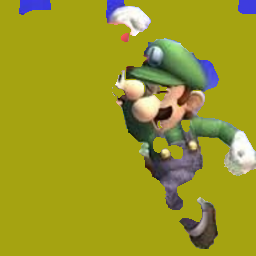

31.98568


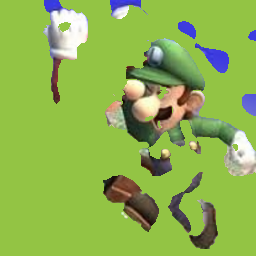

32.050526


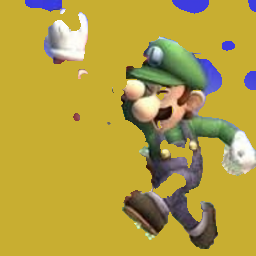

31.704697


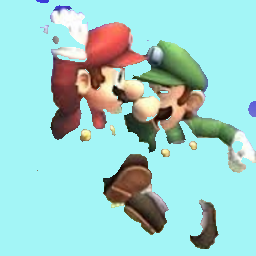

31.701082


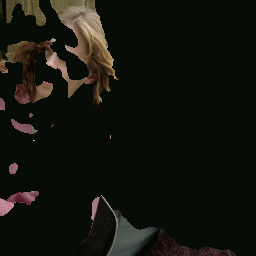

25.142698


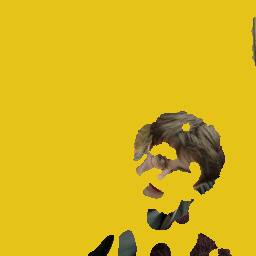

26.059826


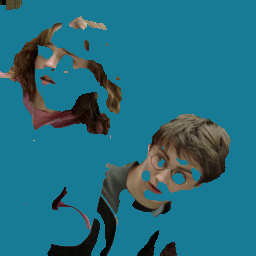

26.93192


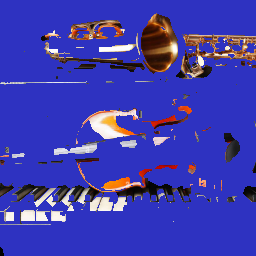

21.836897


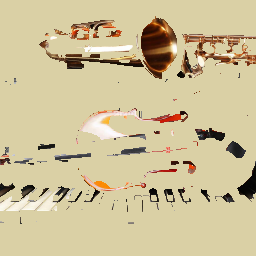

21.78395


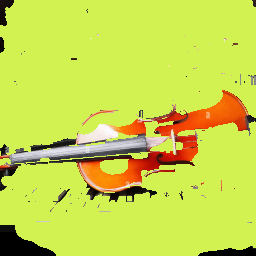

21.768251


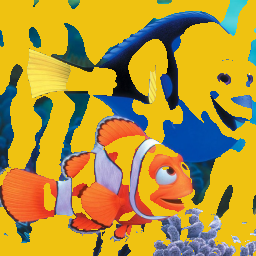

30.981567


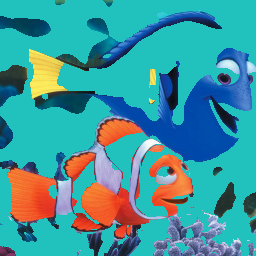

30.44324


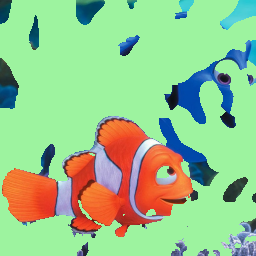

29.809341


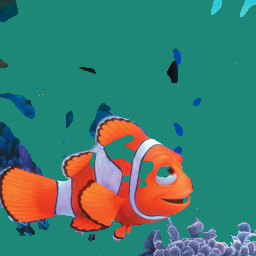

29.249567


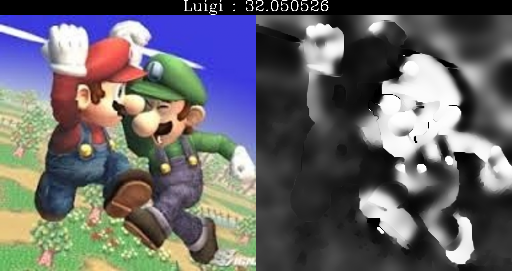

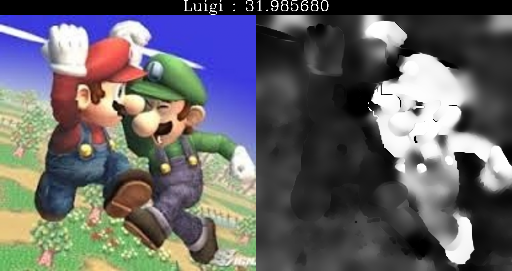

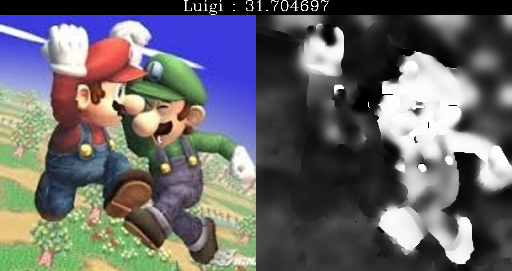

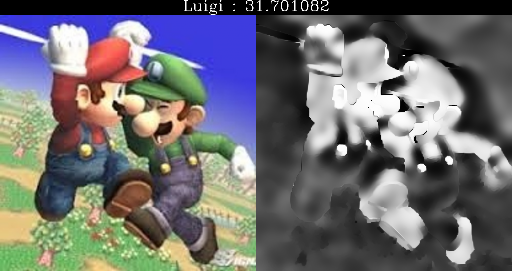

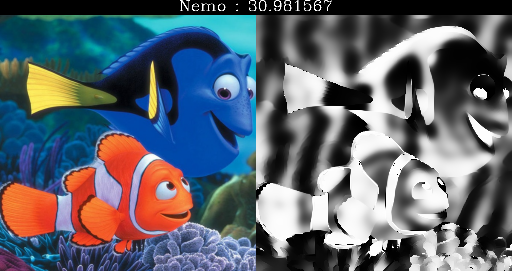

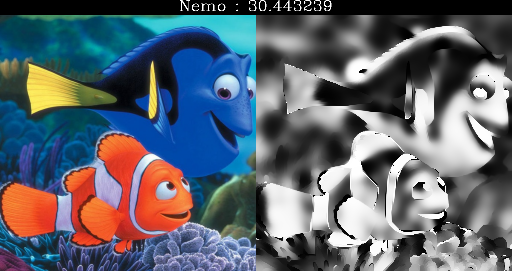

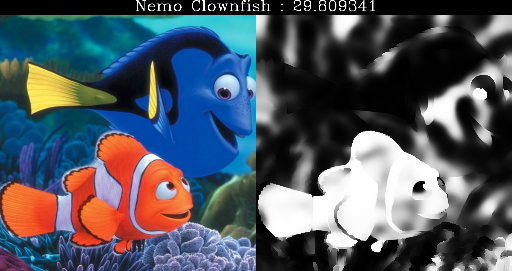

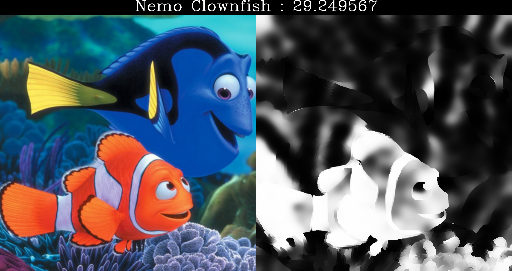

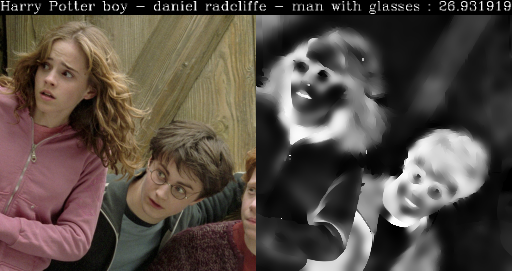

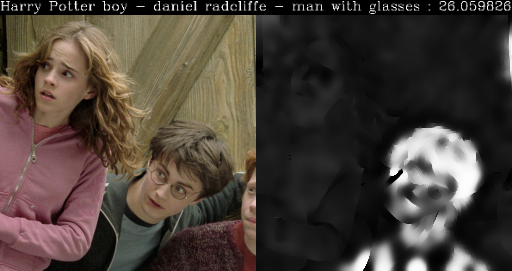

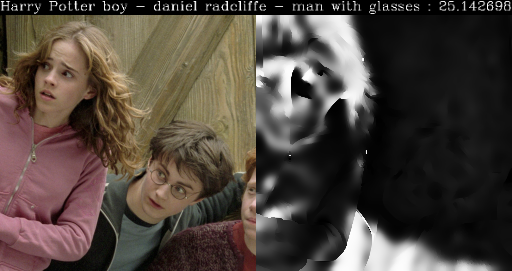

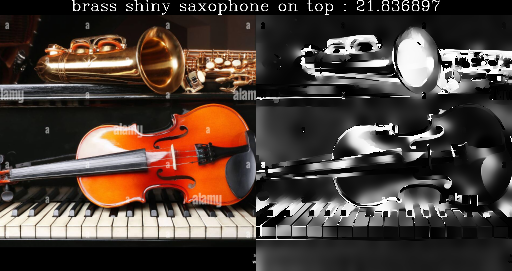

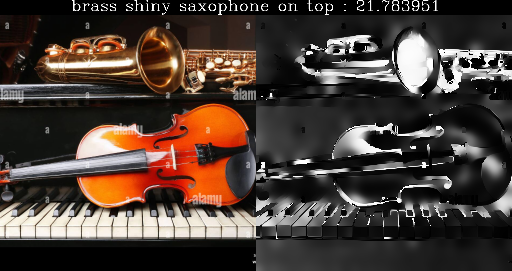

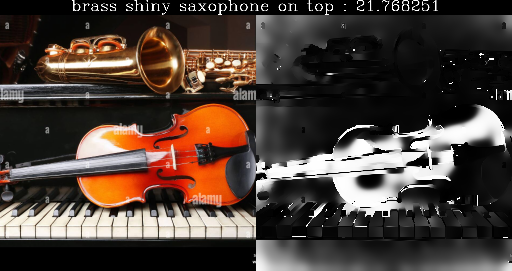

In [72]:
display_ranked_results(*ranked_results(results_collection))

In [ ]:
for _ in range(10):
    results=run_peekaboo('Luigi',
                         "https://i1.sndcdn.com/artworks-000160550668-iwxjgo-t500x500.jpg",
                         representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, GRAVITY=.05,
                         min_step=200,
                         max_step=400,
                         NUM_ITER=100,
                         )
    results_collection.append(results)



In [ ]:
peekaboo.s.min_step=200
peekaboo.s.max_step=600

#Mario vs Luigi Part 1
results=run_peekaboo(
    # 'Luigi', #200/600
    # 'Princess Peach', #200/600H, 
    # 'Mario',
    # 'Bowser from super smash bros; yellow shell; seen from the front', #NO; stable diffusion is too weak to draw this - or I have bad prompts
    
    
                     # "https://i1.sndcdn.com/artworks-000160550668-iwxjgo-t500x500.jpg",
                     # "http://images6.fanpop.com/image/photos/43400000/Mario-Peach-super-mario-bros-43431011-644-704.png",
                                         
                     # bilateral_kwargs=dict(kernel_size = 3,
                     #                  tolerance = .08,
                     #                  sigma = 5,
                     #                  iterations=2,
                     #                 ),
                     # representation='raster',
    
                     representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
#Mario vs Luigi Part 1
peekaboo.s.min_step, peekaboo.s.max_step=200,600
results=run_peekaboo('Mario',
                     "https://i1.sndcdn.com/artworks-000160550668-iwxjgo-t500x500.jpg",
                     representation='raster', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
#Mario vs Luigi Part 2
results=run_peekaboo('Luigi',
                     "https://i1.sndcdn.com/artworks-000160550668-iwxjgo-t500x500.jpg",
                     )

In [ ]:
#Mario vs Luigi Part 2
label = peekaboo.SimpleLabel('Luigi')
blend_factor=.5
label.embedding = label.embedding*(1+blend_factor) - peekaboo.SimpleLabel('Mario').embedding*blend_factor
results=run_peekaboo('Luigi',
                     "https://i1.sndcdn.com/artworks-000160550668-iwxjgo-t500x500.jpg",
                     label=label
                     )

In [ ]:
peekaboo.s.min_step,peekaboo.s.max_step=200,400
#Wine and Cheese Part 1
results=run_peekaboo('Wine Glass half-full',
                     "https://emeraldvalleyartisans.com/wp-content/uploads/2015/10/winecheese1.jpg",
                     representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
peekaboo.s.min_step,peekaboo.s.max_step=200,600
#Wine and Cheese Part 1
results=run_peekaboo('Wine Glass half-full',
                     "https://emeraldvalleyartisans.com/wp-content/uploads/2015/10/winecheese1.jpg",
                     representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
peekaboo.s.min_step,peekaboo.s.max_step=200,400
#Wine and Cheese Part 2
results=run_peekaboo('Swiss Cheese',
                     "https://emeraldvalleyartisans.com/wp-content/uploads/2015/10/winecheese1.jpg",
                     representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
peekaboo.s.min_step,peekaboo.s.max_step=200,600
#Wine and Cheese Part 2
results=run_peekaboo('Swiss Cheese',
                     "https://emeraldvalleyartisans.com/wp-content/uploads/2015/10/winecheese1.jpg",
                     representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
# https://americasrestaurant.com/wp-content/uploads/2022/04/what-do-bread-and-butter-pickles-taste-like.jpg
peekaboo.s.min_step,peekaboo.s.max_step=200,600
#Wine and Cheese Part 3
results=run_peekaboo(
    # 'piano keyboard',
    # 'violin',
    'brass shiny saxophone on top',
                     "https://c8.alamy.com/comp/2GFDH27/violin-with-saxophone-and-piano-closeup-2GFDH27.jpg",
                     # representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

Exception ignored in: <function Animation.__del__ at 0x7f304e42d3a0>
Traceback (most recent call last):
  File "/home/ryan/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 885, in __del__
    def __del__(self):
KeyboardInterrupt: 

KeyboardInterrupt



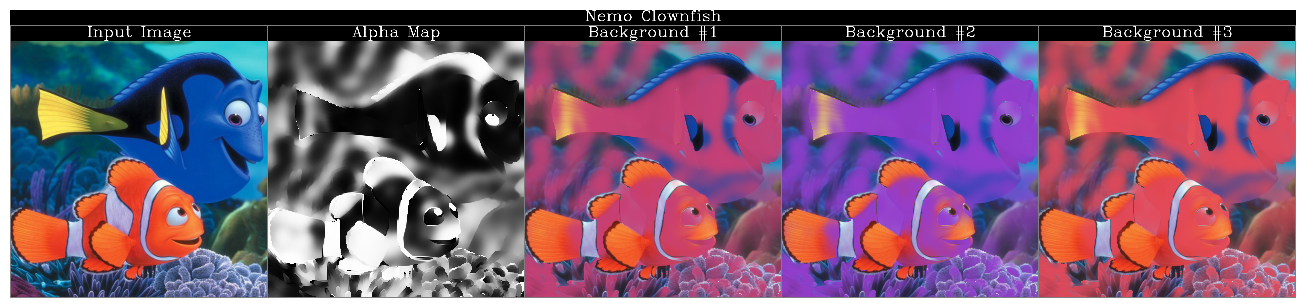

In [71]:
for _ in range(10):
    results=run_peekaboo(
        'Nemo Clownfish',
        'https://akns-images.eonline.com/eol_images/Entire_Site/2016917/rs_600x600-161017135949-600.finding-dory-2.101716.jpg',
        representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200,
        min_step=200, max_step=600,
        GRAVITY=.05,
        NUM_ITER=200,
    )
    results_collection.append(results)

In [ ]:
for _ in range(10):
    results=run_peekaboo(
        'brass shiny saxophone on top',
        "https://c8.alamy.com/comp/2GFDH27/violin-with-saxophone-and-piano-closeup-2GFDH27.jpg",
        representation='raster bilateral',
        LEARNING_RATE=1e-0,
        GUIDANCE_SCALE=200,
        min_step=200,
        max_step=900,
        GRAVITY=.05,
        NUM_ITER=200,
    )
    results_collection.append(results)

In [ ]:
peekaboo.s.min_step,peekaboo.s.max_step=200,400
#Wine and Cheese Part 3
results=run_ipeekaboo('grapes',
                     "https://emeraldvalleyartisans.com/wp-content/uploads/2015/10/winecheese1.jpg",
                     representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
peekaboo.s.min_step,peekaboo.s.max_step=200,600
#Wine and Cheese Part 3
results=run_peekaboo('Green grapes',
                     "https://emeraldvalleyartisans.com/wp-content/uploads/2015/10/winecheese1.jpg",
                     representation='raster bilateral', LEARNING_RATE=1e-0, GUIDANCE_SCALE=200, NUM_ITER=500,  GRAVITY=.05,
                     )

In [ ]:
#Harry Potter Part 1
results=run_peekaboo('Harry Potter boy - daniel radcliffe - man with glasses',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     NUM_ITER=300
                    )

In [ ]:
#Harry Potter Part 2
label = peekaboo.SimpleLabel('Hermoine Granger')
blend_factor=.5
label.embedding = label.embedding*(1+blend_factor) - peekaboo.SimpleLabel('Harry Potter').embedding*blend_factor
results=run_peekaboo('Hermoine',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     label=label
                     )


In [ ]:
#Harry Potter Part 2
label = peekaboo.SimpleLabel('Hermoine Granger - Emma Watson - Girl with long hair')
blend_factor=.5
label.embedding = label.embedding*(1+blend_factor) - peekaboo.SimpleLabel('Harry Potter boy - daniel radcliffe - man with glasses').embedding*blend_factor

results=run_peekaboo('Hermoine',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     label=label
                     )

In [ ]:
#Emma Watson
#Good in a row: |||
#Bad prompts: "Hermoine Granger aka Emma Watson"
results=run_peekaboo('Hermoine Granger - Emma Watson - Girl with long hair',
                     "https://cometothedarkside97.files.wordpress.com/2021/05/images-2020-01-25t073939.551.jpeg?w=468",
                     representation='raster bilateral',
                     LEARNING_RATE=1e-0,
                     GRAVITY=.05,
                     )

In [ ]:
#Emma Watson
#Good in a row: 
#Bad prompts: 
results=run_peekaboo('Harry Potter boy - daniel radcliffe - man with glasses',
                     "https://prisiliaandayani.files.wordpress.com/2014/03/harry-ron-hermione-harry-potter-2422078-361-500.jpg",
                     representation='raster bilateral',
                     LEARNING_RATE=1e-0,
                     GRAVITY=.05,
                     )

In [ ]:
#Good in a row with fixed timestep 500: H,H,
#Bad prompts: 

# peekaboo.s.min_step=100
# peekaboo.s.max_step=500
for _ in range(10):
    results=run_peekaboo(
        'Harry Potter boy - daniel radcliffe - man with glasses',
        # 'Hermoine Granger - Emma Watson - Girl with long hair',

                         "https://i.guim.co.uk/img/media/380500f7fd9321a6cfd1bd1a3b3f104ad9797bb7/0_0_2000_1199/master/2000.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=f0d0ecb5a0c33aa91be270b08619e8d7",
                            # "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                         # "https://prisiliaandayani.files.wordpress.com/2014/03/harry-ron-hermione-harry-potter-2422078-361-500.jpg",

                         representation='raster bilateral',
                         # representation='raster',
                         # bilateral_kwargs=dict(kernel_size = 3,
                         #                  tolerance = .08,
                         #                  sigma = 5,
                         #                  iterations=2,
                         #                 ),
                         # representation='raster',
                         LEARNING_RATE=1e-0,
                         GUIDANCE_SCALE=200,
                         min_step=200,
                         max_step=400,
                         GRAVITY=.05,
                         NUM_ITER=200,
                         )
    results_collection.append(results)

In [ ]:
#Emma Watson
#Good in a row: ||X2X
#Good in a row with fixed timestep: |||||
#Bad prompts: 
results=run_peekaboo('Hermoine Granger - Emma Watson - Girl with long hair',
                     "https://i.guim.co.uk/img/media/380500f7fd9321a6cfd1bd1a3b3f104ad9797bb7/0_0_2000_1199/master/2000.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=f0d0ecb5a0c33aa91be270b08619e8d7",
                     representation='raster bilateral',
                     # bilateral_kwargs=dict(kernel_size = 3,
                     #                  tolerance = .08,
                     #                  sigma = 5,
                     #                  iterations=2,
                     #                 ),
                     # representation='raster',
                     LEARNING_RATE=1e-0,
                     GRAVITY=.05,
                     )

In [ ]:
#Emma Watson
#Good in a row: |||
#Bad prompts: "Emma Watson"
results=run_peekaboo('Hermoine Granger aka Emma Watson',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     representation='raster bilateral',
                     LEARNING_RATE=1e-0,
                     GRAVITY=.05,
                     )

In [ ]:
#Harry Potter 
#Good in a row: ||
results=run_peekaboo('Daniel radcliffe',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     representation='raster bilateral',
                     LEARNING_RATE=1e-0,
                     GRAVITY=.05,
                     )

In [ ]:
#Harry Potter 
#Good in a row: |||||
results=run_peekaboo('Harry Potter boy - daniel radcliffe - man with glasses',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     representation='raster bilateral',
                     LEARNING_RATE=1e-0,
                     GRAVITY=.05,
                     )

In [ ]:
#Mario vs Luigi Part 1
#Good in a row: |||||
results=run_peekaboo('Hermoine Granger - Emma Watson - Girl with long hair',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     representation='raster bilateral',
                     LEARNING_RATE=1e-0,
                     GRAVITY=.05,
                     )

In [ ]:
#Harry Potter Part 2
results=run_peekaboo('Hermoine Granger - Emma Watson - Girl with long hair - left',
                     "https://assets.teenvogue.com/photos/569e7d2a74da98670ff0ce1c/1:1/w_2159,h_2159,c_limit/MCDHAPO_EC797_H.JPG",
                     NUM_ITER=300
                    )

In [ ]:
#Stable Diffusion Basic Demo
#This is a demo cell showing how to simply use Stable Diffusion to generate an image. This is usefull for prompt engineering.
rp.display_image(peekaboo.s.prompt_to_img('Cake'))

In [ ]:
#Stable Diffusion Basic Demo
#This is a demo cell showing how to simply use Stable Diffusion to generate an image. This is usefull for prompt engineering.
for _ in range(30):
    rp.display_image(peekaboo.s.prompt_to_img('Bowser from super smash bros; yellow shell; seen from the front'))